# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The project questions:¶


> <ol>
    <li>Which year was the most popular?</li>
    <li>What are the top five movies based on the vote average?</li>
    <li>What are the top five movies based on the vote count?</li>
    <li>What is the correlation between popularity and budget?</li>
    <li>What is the relation between budget and revenue?</li>
</ol>

**We will start with the project's imports.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (Replace this with more specific notes!)

> <ol>
    <li>check the null values equal or less than zero</li>
    <li>remove these values</li>
    <li>fix the release date colum</li>
    <li>select only the columns that i will be working on</li>
    <li>rename the columns so it will make sense</li>
</ol>

**check the info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**check if there's any null values**

In [4]:
df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


**function to remove the values less than or equal to zero**
> *the reason why i decided to create these function is that i found myself repeating the same lines of code for several columns. so i decided to remove these reptitve code with a single line of function*

In [5]:
def removeValues(arg):
    df[arg] = df[df[arg] > 0]
    return sum(df[arg] <= 0)

**function to check the values less than or equal to zero**
> *I was also repeating this line of code for every column and that's why i decided to replace it.*

In [6]:
def checkValues(arg):
    return sum(df[arg] <= 0)

**checking and removing the less than and equal to zero values in the budget column**

In [7]:
# checking the vLaues of the 
checkValues('budget')

5696

In [8]:
removeValues('budget')

0

**checking and removing the less than and equal to zero values in the revenue column**

In [9]:
checkValues('revenue')

6016

In [10]:
removeValues('revenue')

0

**checking and removing the less than and equal to zero values in the runtime column**

In [11]:
checkValues('runtime')

31

In [12]:
removeValues('runtime')

0

**checking the less than and equal to zero values in the vote_count column**

In [13]:
checkValues('vote_count')

0

**checking the less than and equal to zero values in the vote_average column**

In [14]:
checkValues('vote_average')

0

**checking the less than and equal to zero values in the release_year column**

In [15]:
checkValues('release_year')

0

**checking and removing the less than and equal to zero values in the budget_adj column**

In [16]:
checkValues('budget_adj')

5696

In [17]:
removeValues('budget_adj')

0

**checking and removing the less than and equal to zero values in the revenue_adj column**

In [18]:
checkValues('revenue_adj')

6016

In [19]:
removeValues('revenue_adj')

0

**checking and removing the duplicate values in the id column**

In [20]:
df['id'].duplicated().any()

True

In [21]:
df = df.drop_duplicates(subset='id', keep="first")

In [22]:
df['id'].duplicated().any()

False

**fixing the release_date column**

In [23]:
df.release_date = pd.to_datetime(df['release_date'])

**only choosing the columns that i will be working on**

In [24]:
df = df[['id','popularity', 'budget', 'revenue', 'original_title', 'runtime', 'vote_count', 'vote_average', 'release_year']]
df

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year
0,135397,32.985763,135397,135397,Jurassic World,135397,5562,6.5,2015
1,76341,28.419936,76341,76341,Mad Max: Fury Road,76341,6185,7.1,2015
2,262500,13.112507,262500,262500,Insurgent,262500,2480,6.3,2015
3,140607,11.173104,140607,140607,Star Wars: The Force Awakens,140607,5292,7.5,2015
4,168259,9.335014,168259,168259,Furious 7,168259,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,NaN,NaN,The Endless Summer,21,11,7.4,1966
10862,20379,0.065543,NaN,NaN,Grand Prix,20379,20,5.7,1966
10863,39768,0.065141,NaN,NaN,Beregis Avtomobilya,39768,11,6.5,1966
10864,21449,0.064317,NaN,NaN,"What's Up, Tiger Lily?",21449,22,5.4,1966


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: which year was the most popular?

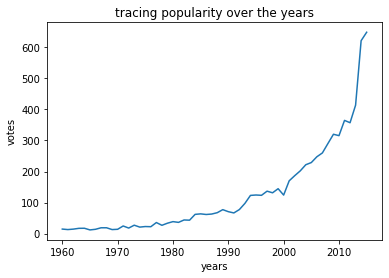

In [25]:
# the first question i want to investigate is which year was the most popular year?

pop = df['popularity'].groupby(df['release_year']).sum()
plt.plot(pop);
plt.title('tracing popularity over the years');
plt.xlabel('years');
plt.ylabel('votes');

**Based on the plot we observe that 2010 was the most popular year.**

### Research Question 2: What are the top five movies based on the vote average?

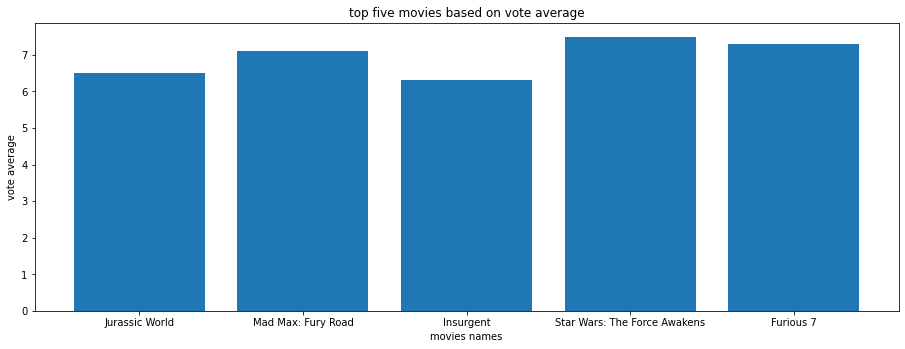

In [26]:
# the second question i want to investigate is the top five movies based on teh vote average

fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
top_votes = df['vote_average'].head(5)
movies = df['original_title'].head(5)
ax.bar(movies,top_votes);
plt.title('top five movies based on vote average');
plt.xlabel('movies names');
plt.ylabel('vote average');
plt.show();

**Based on the bar plot we observe that the top movie is star wars followed by furious 7 then mad max, jurassic world and finally insugent.**

### Research Question 3: What are the top five movies based on the vote count?

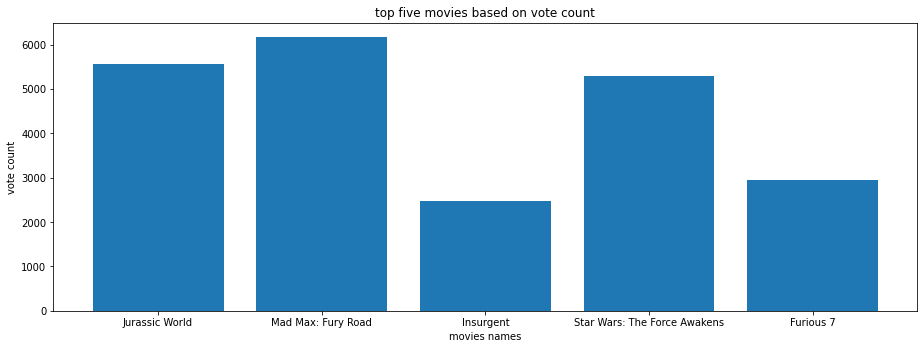

In [27]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
top_votes = df['vote_count'].head(5)
movies = df['original_title'].head(5)
ax.bar(movies,top_votes);
plt.title('top five movies based on vote count');
plt.xlabel('movies names');
plt.ylabel('vote count');
plt.show();

**Based on the bar plot we observe that the top movies are mad max followed by jurassic world then star wars, furious 7 and finally insugent.**

### Research Question 4: What is the correlation between popularity and budget?

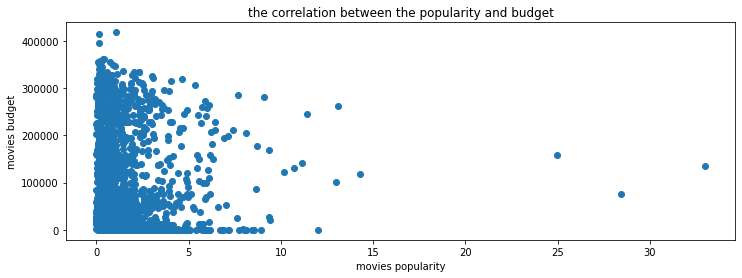

In [28]:
plt.figure(figsize=(12, 4))
plt.scatter(df['popularity'], df['budget'])
plt.title('the correlation between the popularity and budget')
plt.xlabel('movies popularity')
plt.ylabel('movies budget')
plt.show();

**Based on the scatter plot we can observe that the movies popularity and budget has a positive correlation that equals: 0.12080249814063818**

In [29]:
df.dropna(subset = ['budget'], inplace=True)
df['budget'].isnull().any()
int_bidget = df['budget'].astype(int)
int_population = df['popularity'].astype(int)
int_bidget.corr(int_population)

0.12080249814063818

### Research Question 5: What is the relation between budget and revenue?

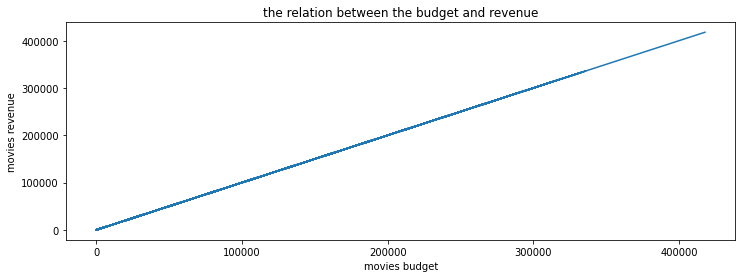

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(df['budget'], df['revenue'])
plt.title('the relation between the budget and revenue')
plt.xlabel('movies budget')
plt.ylabel('movies revenue')
plt.show();

**Based on the plot we can see that there's a positive relation between the movies budget and revenue.**

<a id='conclusions'></a>
## Conclusions

> In this section we will state our conclusions for the project's five questions:
> <ol>
    <li>Based on the first question we see that the year 2010 is the most popular year from the period of 1960 to 2010.</li>
    <li>Based on the second question we see that according to the vote average the most popular movies are star wars followed by furious 7 then mad max, jurassic world and finally insugent.</li>
    <li>Based on the thord question we see that according to the vote count the most popular movies are mad max followed by jurassic world then star wars, furious 7 and finally insugent. hence we see a huge difference between the vote average and the vote count.</li>
    <li>Based on the fourth question we see that the correlation between the popularity and budget is positive and equal to 0.12080249814063818. which means that when the budget increases the movies popularity increases. which actually makes sense because with a bigger budget we will be able to spend more money on advertisements and tours and merch, etc.</li>
    <li>Based on the fifth and final question we see that there's a positive relationship between the movies budget and revenue. Meaning that the movies revenue increases with the budget increase.</li>
</ol>

## Limitations

> The limitations that i have found in the project are that the data has a lot of NAN and zero values. The data is limited and not updated. Also there were more columns that would be valueable to my analysis like the global revenue vs local revenue and advertisement budget.
> <ol>
    <li>The data has a lot of NAN and zero values.</li>
    <li>The data is limited and not updated.</li>
    <li>The data was not in the correct shape.</li>
    <li>There were more columns that would be valueable to my analysis like the advertisement budget.</li>
</ol>

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0